# Exploratory Data Analysis - Retail(Task 3)
## by Chitransh Tarsoliy 
### Objective
-  try to find out the weak areas
-  What I can do to make more profit

<!-- <font color= "red">**Some green text**</font> -->


## Importimg and set-up

In [1]:
Using_Colab = False #@param {type:"boolean"}

import numpy as np
import seaborn as sns
from scipy import stats
import os
from IPython.display import HTML, display

%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.express as px


## Loading Data

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
csv_file = 'SampleSuperstore.csv'

df=pd.read_csv(csv_file)


## Frist look

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<font color= "red">**There is no null values we are good to go**</font>

In [7]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


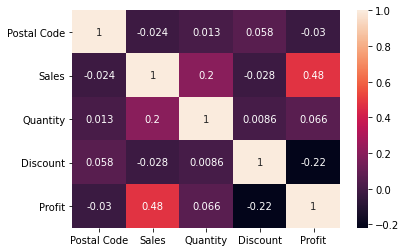

In [8]:
sn.heatmap(df.corr(), annot=True)
plt.show()

<font color= "red">**According to correlation matrix Discounts are negatively correlated and Sales are positvly correlated with signifiacnt magnitude w.r.t. profit**</font>

In [9]:
for k in df.keys():
    print(k + '   \t: '+str(len(df[k].value_counts())))

Ship Mode   	: 4
Segment   	: 3
Country   	: 1
City   	: 531
State   	: 49
Postal Code   	: 631
Region   	: 4
Category   	: 3
Sub-Category   	: 17
Sales   	: 5825
Quantity   	: 14
Discount   	: 12
Profit   	: 7287


In [10]:
df.drop(columns=["Country"], inplace = True)
df.drop(columns=['Postal Code'], inplace = True)

## initial Condition

In [11]:
init_OverAll_Profit = df.Profit.sum()
init_Loss = df[df.Profit < 0].Profit.sum()
init_Profit = df[df.Profit > 0].Profit.sum()

init_Sales = df.Sales.sum()
init_Quantity = df.Quantity.sum()
init_Discount = df.Discount.sum()

init_per_Profit = df.Profit.sum()/df.Sales.sum()*100


print('Overall Profit: ', str(init_OverAll_Profit))
print('Loss:\t\t', str(init_Loss))
print('Profit: \t', str(init_Profit))

print('\n\ntotal Sales: \t', str(init_Sales))
print('total Quantity: ', str(init_Quantity))


print(f'\n\nCurrent % Profit:{init_per_Profit}%')


Overall Profit:  286397.0217
Loss:		 -156131.28569999998
Profit: 	 442528.3074


total Sales: 	 2297200.8603
total Quantity:  37873


Current % Profit:12.467217240315605%


## Let's analyse categorical features

In [12]:

DtypeObject = ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']
for k in DtypeObject:

    data  = df[[k, 'Profit']].groupby(k).sum().sort_values('Profit', ascending = False)
    data1 = df[df.Profit > 0][[k, 'Profit']].groupby(k).sum().sort_values('Profit', ascending = False)
    data2= -df[df.Profit < 0][[k, 'Profit']].groupby(k).sum().sort_values('Profit', ascending = False)

    trace = go.Bar(x=data.index, y=data.values.T[0], marker_color = 'blue', name='Over all profit or loss')
    trace1 = go.Bar(x=data1.index, y=data1.values.T[0], marker_color = 'green', name="Profits")
    trace2 = go.Bar(x=data2.index, y=data2.values.T[0], marker_color = 'red', name='Loss')

    layout = go.Layout(title=k,
                   yaxis=dict(title="Profit"))

    fig = go.Figure(data=[trace, trace1, trace2, ], layout=layout)

    if Using_Colab:
      display(HTML(fig.to_html()))
    else:
      iplot(fig)



In [13]:
# DtypeObject = ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']
# for k in DtypeObject:
#     data = {}
#     data = df[[k, 'Profit']].groupby(k).sum().sort_values('Profit', ascending = False)
#     trace = go.Bar(x=data.index, y=data.values.T[0], name=k)
#     layout = go.Layout(title=k,
#                    yaxis=dict(title="Profit"))
#     fig = go.Figure(data=[trace], layout=layout)
#     iplot(fig)





there are some features with some -ve profit these features are:

    
    * 'City',
    * 'State',
    * 'Sub-Category'
<font color= "red">
lets see the values of these featuresres are responsible for -ve profits
</font>


In [14]:
LookAt = ['City','State','Sub-Category']
for eye in LookAt:
    sub = df[[eye, 'Profit']].groupby(eye).sum()
    sub = sub[sub.Profit<0].sort_values('Profit')
    
    trace = go.Bar(x=sub.index, y=sub['Profit'].values, name='Profit')
    layout = go.Layout(title=eye,
                   yaxis=dict(title="Profit"))
    fig = go.Figure(data=[trace], layout=layout)

    if Using_Colab:
      display(HTML(fig.to_html()))
    else:
      iplot(fig)

conclusion At frist look::
        
       * City with more thn 1.5K loss should be ban
       * City with less thn 1.5K loss should be imporve
       
       * state with more thn 5K loss should be ban
       * State with less thn 5K loss should be imporve
       
       * We should not sell tables
       
       
<font color= "red">     
**lets dive deeper**

In [15]:
# DtypeObject = ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']
# DtypeObject = ['City','State','Sub-Category']
# for k in DtypeObject:
#     data = {}
#     data = df[[k, 'Profit', 'Sales', 'Quantity']].groupby(k).sum().sort_values('Sales', ascending = False)

#     trace1 = go.Bar(x=data.index, y=data['Profit'].values, name='Profit')
#     trace2 = go.Bar(x=data.index, y=data['Sales'].values, name='Sales')
#     trace3 = go.Bar(x=data.index, y=data['Quantity'].values, name='Quantity')
    
#     layout = go.Layout(title=k,
#                    yaxis=dict(title="Profit"))
#     fig = go.Figure(data=[trace1 ,trace2 ,trace3, ], layout=layout)
#     iplot(fig)



#### features are seems fine need no attention

    Ship Mode
    Segment
    Region
    Category
#### features at critical state

    City
    State
#### need little bit attention
    
    Sub-Category
    
    


# City

In [16]:
DtypeObject = ['City', 'State', 'Sub-Category']
for k in DtypeObject:
    data = df[[k, 'Profit', 'Sales', 'Quantity']].groupby(k).sum()
    
    data['Profit-Quantity_Ratio'] = data.Profit / data.Quantity
    data['Profit-Sales_Ratio'] = (data.Profit / data.Sales)*100
    data = data.sort_values('Profit-Sales_Ratio', ascending = False)
    
    trace1 = go.Bar(x=data.index, y=data['Profit-Quantity_Ratio'].values, name='Profit-Quantity_Ratio(profit/loss per unit item)')
    trace2 = go.Bar(x=data.index, y=data['Profit-Sales_Ratio'].values, name='Profit-Sales_Ratio(Persent loss/profit)')
    
    layout = go.Layout(title=k,
                   yaxis=dict(title="Profit"))
    fig = go.Figure(data=[trace1 ,trace2  ], layout=layout)

    if Using_Colab:
      display(HTML(fig.to_html()))
    else:
      iplot(fig)

**Action 1:  Drop cities which are makeing loss more then 3%**

In [18]:
temp_df = df[['City', 'Profit', 'Sales']].groupby('City').sum()
temp_df['Persent_Profit'] = (temp_df.Profit / temp_df.Sales)*100
City_need_imediate_action = temp_df[temp_df["Persent_Profit"] < -3].sort_values('Persent_Profit', ascending = True)
# print(f'City need imediate action, {City_need_imediate_action.City.unique()}')
City_need_imediate_action

,Profit,Sales,Persent_Profit
City,,,
Abilene,-3.7584,1.3920,-270.000000
Mesquite,-87.6200,52.1480,-168.021784
Oswego,-536.1276,321.9780,-166.510631
Romeoville,-14.7708,8.9520,-165.000000
Missouri City,-9.5550,6.3700,-150.000000
...,...,...,...
League City,-31.3499,875.3680,-3.581340
Lakeland,-188.6365,5606.8865,-3.364372
Fort Lauderdale,-161.3551,4929.5325,-3.273233


In [19]:
print('total Sales by these cities: \t ', str(City_need_imediate_action.Sales.sum()))
print('total Profit by these cities: \t', str(City_need_imediate_action.Profit.sum()))
print(f'Current % Profit by these cities:{City_need_imediate_action.Profit.sum()/City_need_imediate_action.Sales.sum()*100}%')



total Sales by these cities: 	  550807.535
total Profit by these cities: 	 -89157.88410000001
Current % Profit by these cities:-16.18675824759732%


In [20]:
cities_to_drop = City_need_imediate_action.index

In [21]:
print('If we ban our supermarket in these cities')
cities_to_drop

If we ban our supermarket in these cities


Index(['Abilene', 'Mesquite', 'Oswego', 'Romeoville', 'Missouri City',
       'Deer Park', 'Littleton', 'Tyler', 'Champaign', 'Waco',
       ...
       'Greensboro', 'El Paso', 'Mason', 'Pembroke Pines', 'Wilson',
       'League City', 'Lakeland', 'Fort Lauderdale', 'Charlotte',
       'Carol Stream'],
      dtype='object', name='City', length=107)

In [22]:
newDF = df.copy()
newDF = newDF.set_index('City')
newDF.drop(cities_to_drop, inplace = True)
newDF.reset_index(level=0, inplace=True) 

In [23]:
len(df), len(newDF)

(9994, 7155)

**effect of action 1**

In [24]:

del_OverAll_Profit_1 = newDF.Profit.sum()
del_Loss_1 = newDF[newDF.Profit < 0].Profit.sum()
del_Profit_1 = newDF[newDF.Profit > 0].Profit.sum()

del_Sales_1 = newDF.Sales.sum()
del_Quantity_1 = newDF.Quantity.sum()

per_Profit_1 = newDF.Profit.sum()/newDF.Sales.sum()*100


print("The figures after removing some cities \n\n")

print('change in OverAll Profit: \t', str(del_OverAll_Profit_1 - init_OverAll_Profit))
print('change in loss: \t\t', str(del_Loss_1 - init_Loss))
# print('change in Profit: \t\t', str(del_Profit_1 - init_Profit))



print(f'change in % Profit:\t\t {((del_OverAll_Profit_1 - init_OverAll_Profit)/init_OverAll_Profit)*100}%')
# print(f'change in % Profit:\t\t {per_Profit_1 - init_per_Profit}%')

print(f'Overall profit after action 1:\t {del_OverAll_Profit_1}')
print(f'% profit after action 1:\t {per_Profit_1}%')




The figures after removing some cities 


change in OverAll Profit: 	 89157.88409999997
change in loss: 		 125384.68029999998
change in % Profit:		 31.130869857086918%
Overall profit after action 1:	 375554.90579999995
% profit after action 1:	 21.504600387515%


<font color= "red">After droping some cities we have incresed profit by the value **89157.88** Which is **31.13%** increment and final profit is **375554.90 (21.5046%)**

# State
#### Lets see what we can do to improve state wise profits

In [25]:
# newDF.drop(columns=['City'], inplace = True)


In [26]:
data = newDF.groupby('State').sum()
# data = newDF[['State', 'Profit', 'Sales', 'Quantity']].groupby('State').sum()
data = data[data.Profit <0]

data['Profit-Quantity_Ratio'] = data.Profit / data.Quantity
data['Profit-Sales_Ratio'] = (data.Profit / data.Sales)*100
data = data.sort_values('Profit-Sales_Ratio', ascending = False)

trace1 = go.Bar(x=data.index, y=data['Profit-Quantity_Ratio'].values, name='Profit-Quantity_Ratio(profit/loss per unit item)')
trace2 = go.Bar(x=data.index, y=data['Profit-Sales_Ratio'].values, name='Profit-Sales_Ratio(Persent loss/profit)')

layout = go.Layout(title='State with -ve profit',
               yaxis=dict(title="Profit"))
fig = go.Figure(data=[trace1 ,trace2], layout=layout)
if Using_Colab:
  display(HTML(fig.to_html()))
else:
  iplot(fig)

<font color= "red"> Lets try to find the resion behind the -ve profits</font>

In [27]:
lookAt = ['Oregon', 'Tennessee', 'Ohio', 'Texas']


df_copy = newDF.set_index('State').T.copy()
for c in set(newDF.set_index('State').T.columns):
    if not c in lookAt:
        df_copy.drop(columns=[c], inplace = True)
df_copy = df_copy.T.reset_index()


df_copy["profit_st"] = df_copy.Profit > 0
df_copy.drop(columns=['Profit'], inplace = True)
df_copy.drop(columns=['Quantity'], inplace = True)
df_copy.drop(columns=['Discount'], inplace = True)

In [28]:
fig = px.parallel_categories(df_copy)

if Using_Colab:
  display(HTML(fig.to_html()))
else:
  iplot(fig)

<font color= "red">from above graph it is understood that in these states ('Oregon', 'Tennessee', 'Ohio', 'Texas') some sub-category are making only loss for example  Binders</font>

Lets look at them one by one

In [29]:
for st in ['Oregon', 'Tennessee', 'Ohio', 'Texas']:
    data = newDF[newDF.State == st]
    # lookAt = data["Sub-Category"].unique()
    

    data1  = data[['Sub-Category', 'Profit']].groupby('Sub-Category').sum().sort_values('Profit', ascending = False)
    data2 = data[data.Profit > 0][['Sub-Category', 'Profit']].groupby('Sub-Category').sum().sort_values('Profit', ascending = False)
    data3= -data[data.Profit < 0][['Sub-Category', 'Profit']].groupby('Sub-Category').sum().sort_values('Profit', ascending = False)

    trace = go.Bar(x=data1.index, y=data1.values.T[0], marker_color = 'blue', name='Over all profit or loss')
    trace1 = go.Bar(x=data2.index, y=data2.values.T[0], marker_color = 'green', name="Profits")
    trace2 = go.Bar(x=data3.index, y=data3.values.T[0], marker_color = 'red', name='Loss')

    layout = go.Layout(title=st,
                   yaxis=dict(title="Profit"))

    fig = go.Figure(data=[trace, trace1, trace2, ], layout=layout)
    if Using_Colab:
      display(HTML(fig.to_html()))
    else:
      iplot(fig)

## Conclusion

From abobe graphes it is clear that there are some Sub-Category which are making only loss in some perticular states
## Action 2

we should stop selling 

* Tables, Bookcases, Machines, Storage, Supplies and Fasteners  in **Oregon**
* Tables, Binders, Storage, Machines, Labels, Supplies and Bookcases in **Tennessee**
* Machines, Phones, Tables, Chairs, Binders, Bookcases, Storage and Supplies in **Ohio**
* Furnishings, Bookcases, Binders, Appliances, Tables, Chairs, Storage, Machines and Supplies in **Texas**




In [41]:
Ban_Oregon = ['Tables', 'Bookcases', 'Machines', 'Storage', 'Supplies' , 'Fasteners']
Ban_Tennessee = ['Tables', 'Binders', 'Storage', 'Machines', 'Labels', 'Supplies', 'Bookcases']
Ban_Ohio = ['Machines', 'Phones', 'Tables', 'Chairs', 'Binders', 'Bookcases', 'Storage', 'Supplies']
Ban_Texas = ['Furnishings', 'Bookcases', 'Binders', 'Appliances', 'Tables', 'Chairs', 'Storage', 'Machines', 'Supplies']


to_drop = (newDF.State == 'Oregon') & (newDF["Sub-Category"] == "Tables")

for d in Ban_Oregon:
    to_drop = to_drop | ((newDF["Sub-Category"] == d) & (newDF.State == 'Oregon'))

for d in Ban_Tennessee:
    to_drop = to_drop | ((newDF["Sub-Category"] == d) & (newDF.State == 'Tennessee'))

for d in Ban_Ohio:
    to_drop = to_drop | ((newDF["Sub-Category"] == d) & (newDF.State == 'Ohio'))
    
for d in Ban_Texas:
    to_drop = to_drop | ((newDF["Sub-Category"] == d) & (newDF.State == 'Texas'))
    


In [31]:
to_drop.sum(), len(to_drop), len(newDF)

(272, 7155, 7155)

In [32]:
newDF.drop(index = newDF[to_drop].index, inplace = True, axis = 0)


**effect of action 2**

In [33]:

del_OverAll_Profit_2 = newDF.Profit.sum()
del_Loss_2 = newDF[newDF.Profit < 0].Profit.sum()
del_Profit_2 = newDF[newDF.Profit > 0].Profit.sum()

del_Sales_2 = newDF.Sales.sum()
del_Quantity_2 = newDF.Quantity.sum()

per_Profit_2 = newDF.Profit.sum()/newDF.Sales.sum()*100

print('change in OverAll Profit: \t', str(del_OverAll_Profit_2 - init_OverAll_Profit))
print('change in loss: \t\t', str(del_Loss_2 - init_Loss))
# print('change in Profit: \t\t', str(del_Profit_1 - init_Profit))



print(f'change in % Profit:\t\t {((del_OverAll_Profit_2 - init_OverAll_Profit)/init_OverAll_Profit)*100}%')

print(f'total profit after action 1:\t {del_OverAll_Profit_2}')


# print('change in Sales: \t', str(del_Sales_1 - init_Sales))
# print('change in Quantity: ', str(del_Quantity_1 - init_Quantity))
# print('change in Discount: ', str(del_Discount_1 - init_Discount))



change in OverAll Profit: 	 103876.56320000003
change in loss: 		 140693.04959999997
change in % Profit:		 36.27012689706334%
total profit after action 1:	 390273.5849


In [34]:
print("as comapre to last time")

print('change in Profit: \t\t', str(del_OverAll_Profit_2 - del_OverAll_Profit_1))
print('% change in Profit: \t\t', str(((del_OverAll_Profit_2 - del_OverAll_Profit_1)/del_OverAll_Profit_1)*100))
print('% change in Profit: \t\t', str(((del_OverAll_Profit_2 - init_OverAll_Profit)/init_OverAll_Profit)*100))

# print('change in Sales: \t', str(del_Sales_1 - init_Sales))
# print('change in Quantity: ', str(del_Quantity_1 - init_Quantity))
# print('change in Discount: ', str(del_Discount_1 - init_Discount))


# print(f'change in % Profit:\t\t {per_Profit_2 - del_Profit_1}%')

# print(f'total profit after action 1:\t {del_Profit_2}')

as comapre to last time
change in Profit: 		 14718.679100000067
% change in Profit: 		 3.9191816889321727
% change in Profit: 		 36.27012689706334


In [35]:
df_copy = newDF.copy()


df_copy["profit_st"] = df_copy.Profit > 0
df_copy.drop(columns=['Profit'], inplace = True)
df_copy.drop(columns=['State'], inplace = True)
df_copy.drop(columns=['Quantity'], inplace = True)
df_copy.drop(columns=['Discount'], inplace = True)


fig = px.parallel_categories(df_copy)

if Using_Colab:
  display(HTML(fig.to_html()))
else:
  iplot(fig)

<font color= "red">In above graph it is shown that major part of loss is removed</font>

In [36]:
data = newDF.groupby('State').sum()
# data = newDF[['State', 'Profit', 'Sales', 'Quantity']].groupby('State').sum()
# data = data[data.Profit <0]

data['Profit-Quantity_Ratio'] = data.Profit / data.Quantity
data['Profit-Sales_Ratio'] = (data.Profit / data.Sales)*100
data = data.sort_values('Profit-Sales_Ratio', ascending = False)

trace1 = go.Bar(x=data.index, y=data['Profit-Quantity_Ratio'].values, name='Profit-Quantity_Ratio(profit/loss per unit item)')
trace2 = go.Bar(x=data.index, y=data['Profit-Sales_Ratio'].values, name='Profit-Sales_Ratio(Persent loss/profit)')

layout = go.Layout(title=k,
               yaxis=dict(title="Profit"))
fig = go.Figure(data=[trace1 ,trace2], layout=layout)
if Using_Colab:
  display(HTML(fig.to_html()))
else:
  iplot(fig)

# Sub-Category

In [37]:
data = newDF.groupby('Sub-Category').sum()
# data = newDF[['State', 'Profit', 'Sales', 'Quantity']].groupby('State').sum()
# data = data[data.Profit <0]

data['Profit-Quantity_Ratio'] = data.Profit / data.Quantity
data['Profit-Sales_Ratio'] = (data.Profit / data.Sales)*100
data = data.sort_values('Profit-Sales_Ratio', ascending = False)

trace1 = go.Bar(x=data.index, y=data['Profit-Quantity_Ratio'].values, name='Profit-Quantity_Ratio(profit/loss per unit item)')
trace2 = go.Bar(x=data.index, y=data['Profit-Sales_Ratio'].values, name='Profit-Sales_Ratio(Persent loss/profit)')

layout = go.Layout(title='Sub-Category',
               yaxis=dict(title="Profit"))
fig = go.Figure(data=[trace1 ,trace2], layout=layout)
if Using_Colab:
  display(HTML(fig.to_html()))
else:
  iplot(fig)

<font color= "red">Sub-Category alerady looking batter.

lets give a look to full data
</font>

In [38]:

DtypeObject = ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']
for k in DtypeObject:

    data  = newDF[[k, 'Profit']].groupby(k).sum().sort_values('Profit', ascending = False)
    data1 = newDF[newDF.Profit > 0][[k, 'Profit']].groupby(k).sum().sort_values('Profit', ascending = False)
    data2= -newDF[newDF.Profit < 0][[k, 'Profit']].groupby(k).sum().sort_values('Profit', ascending = False)

    trace = go.Bar(x=data.index, y=data.values.T[0], marker_color = 'blue', name='Over all profit or loss')
    trace1 = go.Bar(x=data1.index, y=data1.values.T[0], marker_color = 'green', name="Profits")
    trace2 = go.Bar(x=data2.index, y=data2.values.T[0], marker_color = 'red', name='Loss')

    layout = go.Layout(title=k,
                   yaxis=dict(title="Profit"))

    fig = go.Figure(data=[trace, trace1, trace2, ], layout=layout)

    if Using_Colab:
      display(HTML(fig.to_html()))
    else:
      iplot(fig)



<font color= "red">Almost all the losses are removed so</font>

# Conclusion

* In this Notebook I tried to minimise the loss. 
* I suggest 2 Actions to reudues losses
    - 1st Ban 107 cities
    - 2nd Ban some Sub-Category in these 'Oregon', 'Tennessee', 'Ohio', 'Texas' state
    
These 2 action combine reduse loss by the value 140693.04 wich is **90.11%**
and inc overall profit by the value 103876.56 which is **36.27%**

In [39]:
print("% change in loss and overall profit after both action")
print(f'change in loss :   {((del_Loss_2 - init_Loss)/init_Loss)*100}%')
print(f'change in profit:  {((del_OverAll_Profit_2 - init_OverAll_Profit)/init_OverAll_Profit)*100}')



% change in loss and overall profit after both action
change in loss :   -90.11201628758508%
change in profit:  36.27012689706334
